In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os

# DS Project
# 1 - Collect data
# 2 - Clean data (check for null values, formats) and preprocess data
# 3 - EDA (Exploratory Data Analysis) - data summary, understand rows and columns, 
# data visualization (histograms, line charts, bar charts, pie charts)
# 4 - Conclusions - what did you find in the data?

**1. Data Importing**

In [2]:
data_file = "Resources/life_expectancy_data_region.csv" 

In [3]:
life_df = pd.read_csv(data_file)

life_df.head()

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Region", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]

In [5]:
life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS"
                        })  
life_df.head()

,Country,Year,Region,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [6]:
life_df['Region'].value_counts()

Europe                   802
Africa                   752
Americas                 530
Western Pacific          342
Eastern Mediterranean    336
South-East Asia          176
Name: Region, dtype: int64

In [25]:
life_df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [24]:
life_df.describe()

,Year,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
count,2938.000000,2928.000000,2928.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2775.000000
mean,2007.518720,69.224932,164.796448,4.602861,738.251295,80.940461,2419.592240,38.321247,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,11.992793
std,4.613841,9.523867,124.292079,4.052413,1987.914858,25.070016,11467.272489,20.044034,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,3.358920
min,2000.000000,36.300000,1.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.000000
25%,2004.000000,63.100000,74.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,10.100000
50%,2008.000000,72.100000,144.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,12.300000
75%,2012.000000,75.700000,228.000000,7.702500,441.534144,97.000000,360.250000,56.200000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,14.300000
max,2015.000000,89.000000,723.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,20.700000


In [ ]:
# NA values

In [27]:
# Line graphs for all regions (time series vs each column analyzed)
# Pick top 2-3 countries from Europe and Africa
# Scatterplot and linear regression (not using time series)

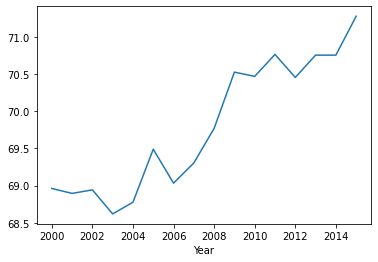

In [8]:
em = life_df[life_df['Region']=='Eastern Mediterranean']
em_le = em.groupby(['Year']).mean()['Life Expectancy']
em_le.plot(kind='line')
plt.show()

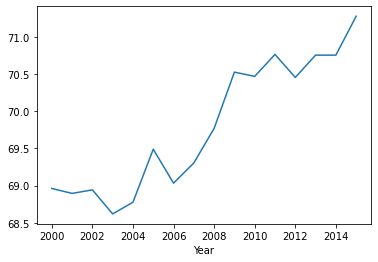

In [34]:
euro = life_df[life_df['Region']=='Europe']
euro_le = em.groupby(['Year']).mean()['Life Expectancy']
euro_le.plot(kind='line')
plt.show()

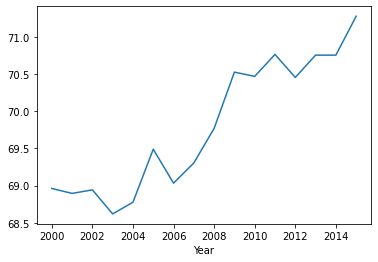

In [32]:
africa = life_df[life_df['Region']=='Africa']
africa_le = em.groupby(['Year']).mean()['Life Expectancy']
africa_le.plot(kind='line')
plt.show()

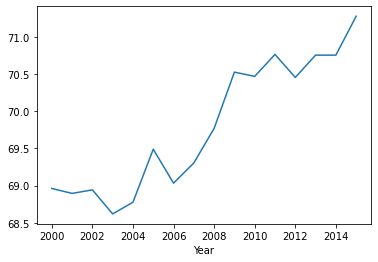

In [33]:
americas = life_df[life_df['Region']=='Americas']
americas_le = em.groupby(['Year']).mean()['Life Expectancy']
americas_le.plot(kind='line')
plt.show()

In [9]:
year_2015 = life_df[life_df['Year'] == 2015] #.groupby('Country')
year_2015 = year_2015.reset_index()
year_2015 = year_2015.drop(columns=['index'])
year_2015.head()

,Country,Year,Region,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Albania,2015,Europe,Developing,77.8,74.0,4.60,364.975229,99.0,0,58.0,99.0,6.00,99.0,0.1,3954.227830,28873.0,14.2
2,Algeria,2015,Africa,Developing,75.6,19.0,NaN,0.000000,95.0,63,59.5,95.0,NaN,95.0,0.1,4132.762920,39871528.0,14.4
3,Angola,2015,Africa,Developing,52.4,335.0,NaN,0.000000,64.0,118,23.3,7.0,NaN,64.0,1.9,3695.793748,2785935.0,11.4
4,Antigua and Barbuda,2015,Americas,Developing,76.4,13.0,NaN,0.000000,99.0,0,47.7,86.0,NaN,99.0,0.2,13566.954100,NaN,13.9


In [11]:
dev_df = life_df.loc[life_df["Status"] == "Developed"]
dev_df.head()

,Country,Year,Region,Status,Life Expectancy,Adult Mortality,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
112,Australia,2015,Western Pacific,Developed,82.8,59.0,NaN,0.00000,93.0,74,66.6,93.0,NaN,93.0,0.1,56554.38760,23789338.0,20.4
113,Australia,2014,Western Pacific,Developed,82.7,6.0,9.71,10769.36305,91.0,340,66.1,92.0,9.42,92.0,0.1,62214.69120,2346694.0,20.4
114,Australia,2013,Western Pacific,Developed,82.5,61.0,9.87,11734.85381,91.0,158,65.5,91.0,9.36,91.0,0.1,67792.33860,23117353.0,20.3
115,Australia,2012,Western Pacific,Developed,82.3,61.0,10.03,11714.99858,91.0,199,65.0,92.0,9.36,92.0,0.1,67677.63477,22728254.0,20.1
116,Australia,2011,Western Pacific,Developed,82.0,63.0,10.30,10986.26527,92.0,190,64.4,92.0,9.20,92.0,0.1,62245.12900,223424.0,19.8


In [19]:
life_df.isnull().sum()

Country                     0
Year                        0
Region                      0
Status                      0
Life Expectancy            10
Adult Mortality            10
Alcohol                   194
Percentage Expenditure      0
Hepatitis B               553
Measles                     0
BMI                        34
Polio                      19
Total Expenditure         226
Diphtheria                 19
HIV/AIDS                    0
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [20]:
clean_df = life_df.fillna(life_df.mean())
clean_df.isnull().sum()

Country                   0
Year                      0
Region                    0
Status                    0
Life Expectancy           0
Adult Mortality           0
Alcohol                   0
Percentage Expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
Polio                     0
Total Expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Schooling                 0
dtype: int64

In [38]:
undev_df = clean_df.loc[clean_df["Status"] == "Developing"]
dev_df = clean_df.loc[clean_df["Status"] == "Developed"]


The r-value is:
0.2037714374002677


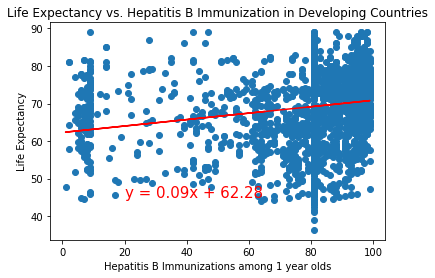

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_df['Hepatitis B'], clean_df['Life Expectancy'])
regress_values = clean_df['Hepatitis B'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(clean_df['Hepatitis B'], clean_df['Life Expectancy'])
plt.plot(clean_df['Hepatitis B'], regress_values, "r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.xlabel("Hepatitis B Immunizations among 1 year olds")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Hepatitis B Immunization in all Countries")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

The r-value is:
0.47541838493660665


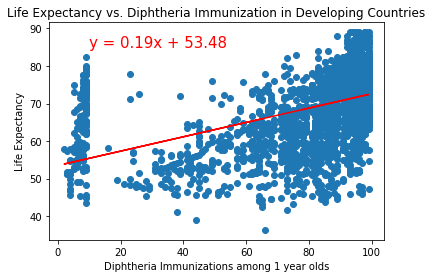

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_df['Diphtheria'], clean_df['Life Expectancy'])
regress_values = clean_df['Diphtheria'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(clean_df['Diphtheria'], clean_df['Life Expectancy'])
plt.plot(clean_df['Diphtheria'], regress_values, "r-")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")
plt.xlabel("Diphtheria Immunizations among 1 year olds")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Diphtheria Immunization in all Countries")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

The r-value is:
0.4615737754457901


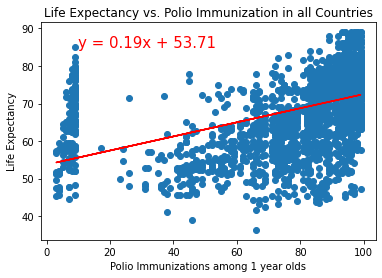

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_df['Polio'], clean_df['Life Expectancy'])
regress_values = clean_df['Polio'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(clean_df['Polio'], clean_df['Life Expectancy'])
plt.plot(clean_df['Polio'], regress_values, "r-")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")
plt.xlabel("Polio Immunizations among 1 year olds")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Polio Immunization in all Countries")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

The r-value is:
0.4550421641407508


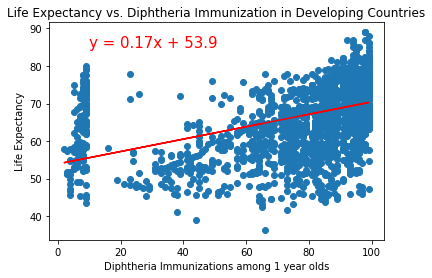

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(undev_df['Diphtheria'], undev_df['Life Expectancy'])
regress_values = undev_df['Diphtheria'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(undev_df['Diphtheria'], undev_df['Life Expectancy'])
plt.plot(undev_df['Diphtheria'], regress_values, "r-")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")
plt.xlabel("Diphtheria Immunizations among 1 year olds")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Diphtheria Immunization in Developing Countries")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

The r-value is:
-0.019604630082789887


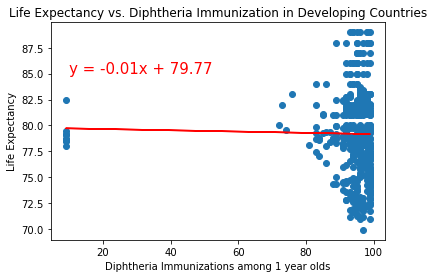

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(dev_df['Diphtheria'], dev_df['Life Expectancy'])
regress_values = dev_df['Diphtheria'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(dev_df['Diphtheria'], dev_df['Life Expectancy'])
plt.plot(dev_df['Diphtheria'], regress_values, "r-")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")
plt.xlabel("Diphtheria Immunizations among 1 year olds")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Diphtheria Immunization in Developing Countries")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

In [ ]:
dev_mortality_summary = dev_df.groupby("Country").agg({'Adult Mortality':["mean"]})
dev_mortality_summary.head()

In [ ]:
undev_mortality_summary = undev_df.groupby("Country").agg({'Adult Mortality':["mean","median", "var", "std", "sem"]})
undev_mortality_summary.head()

In [ ]:
undev_mortality_summary = undev_df.groupby("Country").agg({'Alcohol':["mean"]})
undev_mortality_summary.head()